<a href="https://colab.research.google.com/github/ronakbihani123/Unsupervised_ml_algorithm/blob/main/kmeans_with_outlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/mall.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
df = df.drop(columns= ["Genre" , "CustomerID"])

In [ ]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [ ]:
x = df.iloc[: , [0,1]].values


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
a = []

for i in range(1, 11):
  b = KMeans(n_clusters = i , init="k-means++" , random_state=42)
  b.fit(x)
  a.append(b.inertia_)

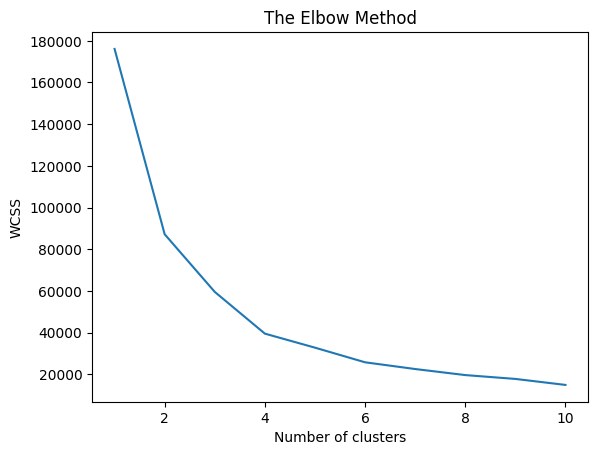

In [ ]:
plt.plot(range(1,11) , a)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
b = KMeans(n_clusters=4 , init="k-means++" , random_state=42)
y_predict = b.fit_predict(x)

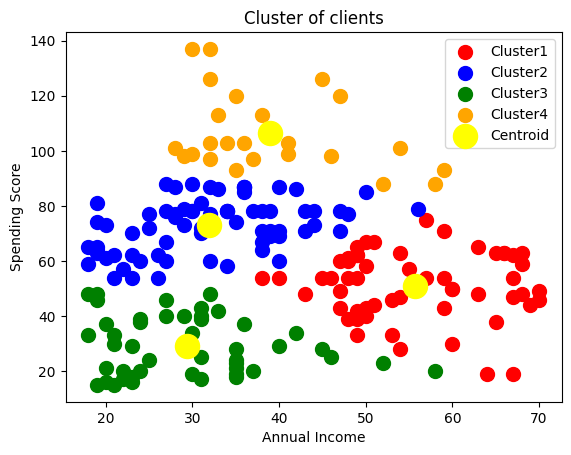

In [ ]:
plt.scatter(x[y_predict==0,0] , x[y_predict == 0,1] ,  s = 100 , c  = "red" , label = "Cluster1")
plt.scatter(x[y_predict == 1,0] , x[y_predict==1 , 1] , s = 100  , c = "blue" , label= "Cluster2")
plt.scatter(x[y_predict==2 , 0] , x[y_predict==2 , 1 ], s = 100 , c = "green" , label = "Cluster3")
plt.scatter(x[y_predict == 3 , 0 ], x[y_predict == 3 ,1] , s = 100 , c = "orange" , label = "Cluster4")
plt.scatter(b.cluster_centers_[:,0] , b.cluster_centers_[: , 1] , s = 300 , c = "yellow" , label = "Centroid")
plt.title("Cluster of clients")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

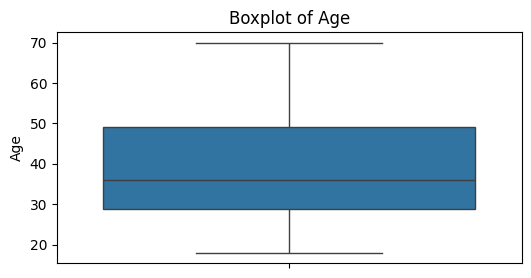

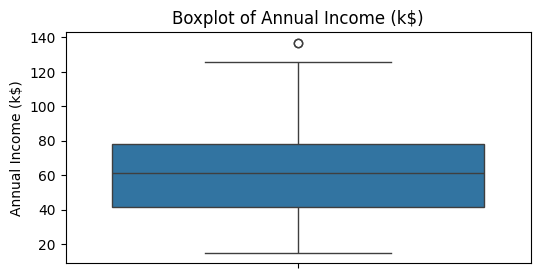

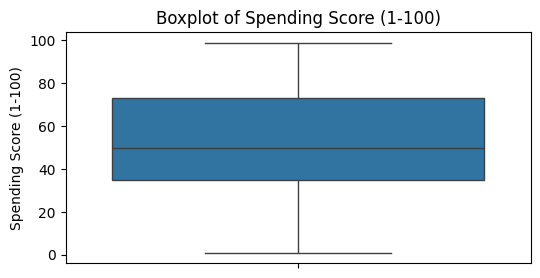

In [ ]:
import seaborn as sns
for col in df.select_dtypes(include=["int64" , "float32"]).columns:
  plt.figure(figsize=(6,3))
  sns.boxplot(df[col])
  plt.title(f"Boxplot of {col}")
  plt.show()


In [ ]:
def remove_outliers(df):
  df_capped = df.copy()
  for col in df_capped.select_dtypes(include=["int64" , "float32"]).columns:
    q1 = df_capped[col].quantile(0.25)
    q3 = df_capped[col].quantile(0.75)
    IQR = q3-q1
    lower_bound = q1-1.5*IQR
    upper_bound = q3+1.5*IQR
    df_capped[col] = df_capped[col].apply(lambda x : lower_bound if x< lower_bound else upper_bound if x> upper_bound else x)
  return df_capped

In [ ]:
df_capped = remove_outliers(df)

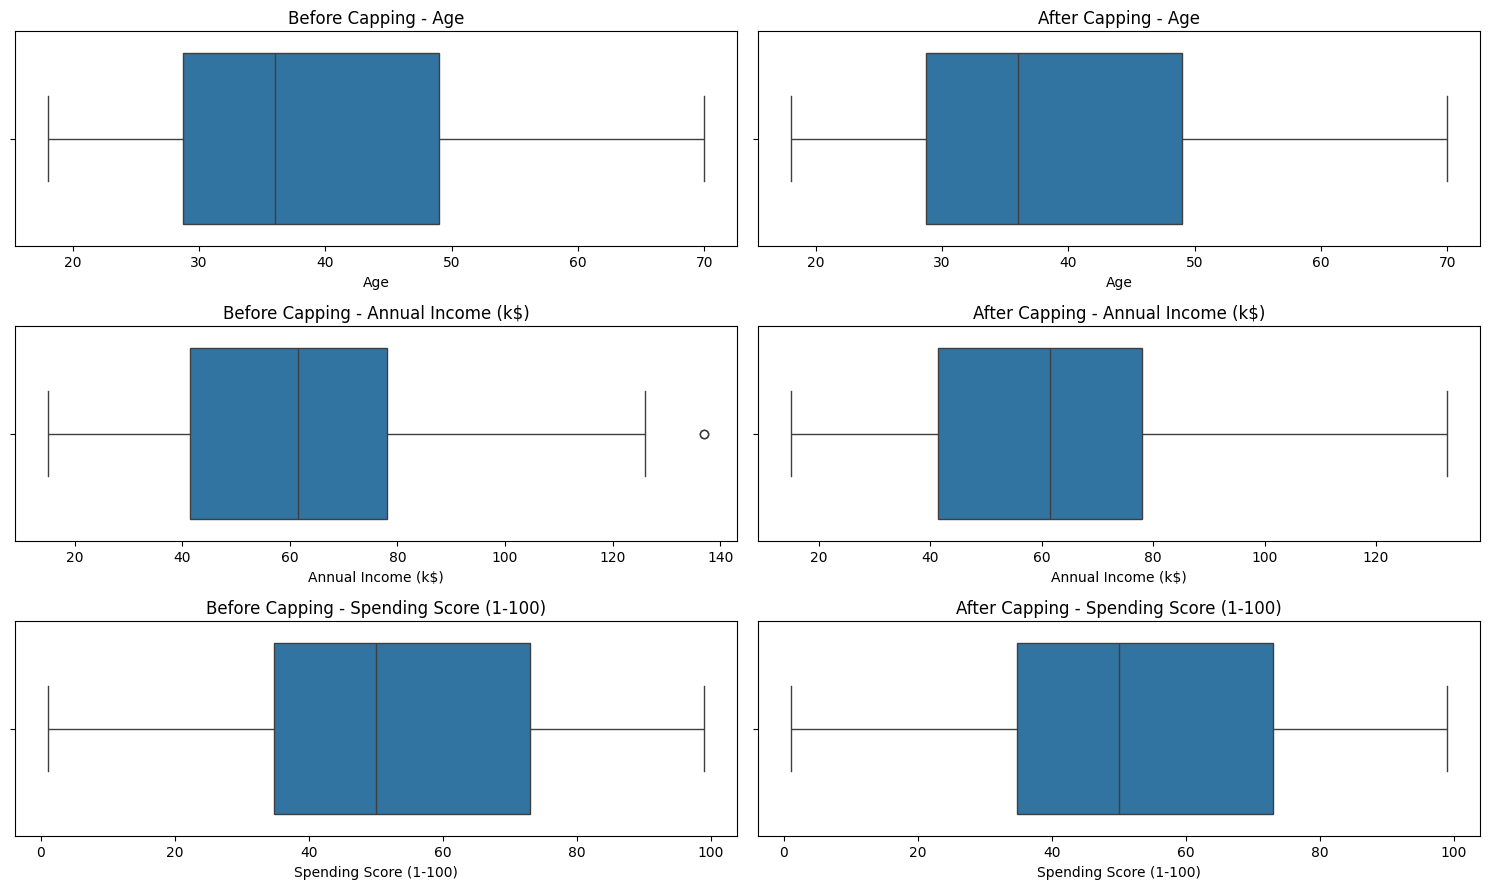

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
numeric_cols = df.select_dtypes(include=['float64','int64']).columns

# Set figure size dynamically
plt.figure(figsize=(15, len(numeric_cols)*3))

# Loop through each numeric column
for i, col in enumerate(numeric_cols, 1):
    # Before Capping
    plt.subplot(len(numeric_cols), 2, 2*i-1)
    sns.boxplot(x=df[col])
    plt.title(f"Before Capping - {col}")

    # After Capping
    plt.subplot(len(numeric_cols), 2, 2*i)
    sns.boxplot(x=df_capped[col])
    plt.title(f"After Capping - {col}")

plt.tight_layout()
plt.show()
